In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy



import numpy as np
import random
import math
from sklearn.utils import shuffle
from scipy.stats import kendalltau

from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt


Generating an imbalanced data set with 25 'positive' and 75 'negative' events

In [2]:
truth = np.append(np.ones(250),np.zeros(750))
print(truth)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

If I simply guess all 0's my accuracy is 75%

In [3]:
classifications = np.zeros(1000)

In [4]:
tp = np.sum([truth[i]==1 and classifications[i]==1 for i,x in enumerate(truth)])
tn = np.sum([truth[i]==0 and classifications[i]==0 for i,x in enumerate(truth)])
fp = np.sum([truth[i]==0 and classifications[i]==1 for i,x in enumerate(truth)])
fn = np.sum([truth[i]==1 and classifications[i]==0 for i,x in enumerate(truth)])

In [5]:
print("accuracy = ",(tp+tn)/(tp+tn+fp+fn))

accuracy =  0.75


Now let's create a less trivial classifier: one that identifies 1's (positives) with 90% sensitivity (i.e. recall) and 0's (negatives) with 80% specificity

In [6]:
sensitivityOrRecall = 0.50
specificity = 0.90

In [7]:
classifications=[]
for event in truth:
    classification=-1
    if (event==0):
        classification = 0 if random.uniform(0,1)<specificity else 1
    else:
        classification = 1 if random.uniform(0,1)<sensitivityOrRecall else 0
    classifications=np.append(classifications,[classification])
print(classifications)

[0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

OK so now let's empirically calculate sensitivity, specificity, accuracy and precision

uncomment this to see how everything changes when the data set becomes balanced!
specificity and sensitivity should remain the same, everything else should change

In [8]:
#truth = np.append(np.ones(500),np.zeros(500))
#print(truth)
#classifications=[]
#for event in truth:
#    classification=-1
#    if (event==0):
#        classification = 0 if random.uniform(0,1)<specificity else 1
#    else:
#        classification = 1 if random.uniform(0,1)<sensitivityOrRecall else 0
#    classifications=np.append(classifications,[classification])
#print(classifications)

In [9]:
tp = np.sum([truth[i]==1 and classifications[i]==1 for i,x in enumerate(truth)])
tn = np.sum([truth[i]==0 and classifications[i]==0 for i,x in enumerate(truth)])
fp = np.sum([truth[i]==0 and classifications[i]==1 for i,x in enumerate(truth)])
fn = np.sum([truth[i]==1 and classifications[i]==0 for i,x in enumerate(truth)])

print("tp=",tp)
print("tn=",tn)
print("fp=",fp)
print("fn=",fn)


print("sensitivity (recall)=",tp/(tp+fn))
print("specificity=",tn/(tn+fp))
print("accuracy=",(tp+tn)/(tp+tn+fp+fn))
print("precision= ",tp/(tp+fp))


tp= 126
tn= 681
fp= 69
fn= 124
sensitivity (recall)= 0.504
specificity= 0.908
accuracy= 0.807
precision=  0.6461538461538462


If we treat the 'truth' and 'classifications' as simply two different opinions about how the data should be classified, we can calculate Cohen's Kappa

In [10]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
p0=accuracy
numberOfTimesTruthPicked0=np.sum(truth==0)
numberOfTimesClassifierPicked0=np.sum(classifications==0)
numberOfTimesTruthPicked1=np.sum(truth==1)
numberOfTimesClassifierPicked1=np.sum(classifications==1)

pe=(numberOfTimesTruthPicked0*numberOfTimesClassifierPicked0+numberOfTimesTruthPicked1*numberOfTimesClassifierPicked1)/pow(1000,2)

#note: pe = probability of both randomly picking 0 + the probability of both randomly picking 1
#    in words, probability of both randomly picking 0 OR the probability of both randomly picking 1

print("cohen's kappa: ",(p0-pe)/(1-pe))

cohen's kappa:  0.4446043165467628


Calculating AROC

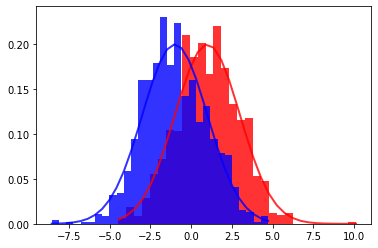

In [63]:
transparency=0.8
mu = 1
sigma = 2
signal = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(signal, 30, density=True,alpha=transparency,color='r')
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r',alpha=transparency)
mu = -1
sigma = 2
background = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(background, 30, density=True,alpha=transparency,color='b')
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='b',alpha=transparency)

plt.show()

# first 1000 come from mu=1, second 1000 come from mu=-1
truth=np.append(1000*["signal"],1000*["background"]) # could just as easily make the labels 0's and 1's or -1's and 1's, etc.
                                                     # I'm going to define the 'positive' label later in the function that I call to calculate aroc!
classifications=np.append(signal,background)

['signal' 'signal' 'signal' ... 'background' 'background' 'background']
[-0.22633772  0.90705059 -0.32453822 ... -1.80192433  1.20457328
  1.55062284]
AROC= 0.769034
probability that for any signal and any background, that signal>background:  0.769


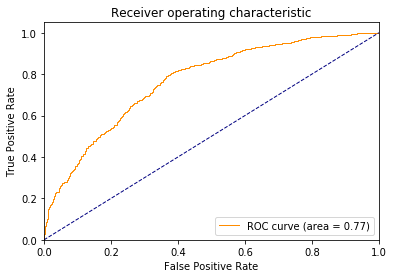

In [64]:
#outcome = np.append(np.zeros(10),np.ones(10))
#predictions = np.append(np.random.uniform(low=0., high=1.0, size=(10,)),np.random.uniform(low=0., high=1.0, size=(10,))

y = truth
scores = classifications
print(y)
print(scores)
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label="signal") # beware: some aroc functions (e.g., in R) calculate the rocs assuming the positive label to be one group then the other group, and takes the largest AROC
roc_auc = auc(fpr, tpr)

print("AROC=",roc_auc)

# compare this to the calculation of the probability that for any signal and any background signal>background
count=0.0
for i in range(1000):
    if (signal[i]>background[i]):
        count+=1

print("probability that for any signal and any background, that signal>background: ",count/1000.0)
        
                        
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Now we're going going to do something slightly related: calculate lift

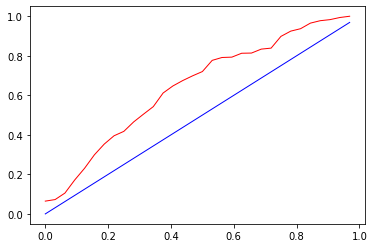

In [130]:
#
nPoints=int(math.pow(2,5))
randomCustomerProbabilities =  np.random.random(nPoints)

# 

# Ok now suppose I have a model that ranks them according to best to worse response rate
# here I'm going to do this by creating a semi-ordered array (you can ignore the details of how I do this)
def randomizeAccordingToKendallTau(rankedList,tau=0.8):
    newTau=-1
    while(newTau<tau):
        newRanking=shuffle(rankedList)
        newTau=kendalltau(rankedList, newRanking)[0] 
#        print(tau)
    return newRanking
slightlyRandomCustomerProbabilities=randomizeAccordingToKendallTau(sorted(randomCustomerProbabilities,reverse=True),tau=0.45)

# I'll then plot the 'lift' as a function of % of the total population
accumulatedCounts = 0
randomLiftCurve=[]
for prob in randomCustomerProbabilities:
    accumulatedCounts+=prob
    randomLiftCurve=np.append(randomLiftCurve,[accumulatedCounts])
accumulatedCounts = 0
slightlyRandomLiftCurve=[]
for prob in slightlyRandomCustomerProbabilities:
    accumulatedCounts+=prob
    slightlyRandomLiftCurve=np.append(slightlyRandomLiftCurve,[accumulatedCounts])

thresholds=np.array(range(0,nPoints))/float(nPoints)
#print(thresholds)
plt.figure()
plt.plot(np.array(range(0,nPoints))/float(nPoints), np.array(range(0,nPoints))/float(nPoints), color='b', lw=1, label='Lift Curve')
plt.plot(thresholds, slightlyRandomLiftCurve/accumulatedCounts, color='r', lw=1, label='Lift Curve')




Normalized Discounted Cumulative Gain
https://www.kaggle.com/nickbowman/ndcg-example

In [48]:
# 10 annotator-ranked ranked documents judged on 0-3 relevance scale: 
annotatorRanks = [3,2,3,0,0,1,2,2,3,0]
# 10 annotator-ranked ranked documents judged on 0-3 relevance scale: 
randomizedAnnotatorRanks = shuffle(annotatorRanks)

# Rank from search engine:
searchEngineRanks = [1,2,3,4,5,6,7,8,9,10]
# will need this to normalize the discounted cumulative gain
optimalAnnotatorRanks=sorted(annotatorRanks,reverse=True)

In [49]:
print(annotatorRanks)
print(randomizedAnnotatorRanks)
print(searchEngineRanks)
print(optimalAnnotatorRanks)

[3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
[3, 0, 0, 2, 0, 2, 3, 1, 2, 3]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[3, 3, 3, 2, 2, 2, 1, 0, 0, 0]


In [51]:
discountedCumulativeGain = np.sum([(math.pow(2,annotatorRank)+1.0)/math.log(searchEngineRank[i]+1) for i,annotatorRank in enumerate(annotatorRanks)])

In [52]:
print("discountedCumulativeGain=",discountedCumulativeGain)

discountedCumulativeGain= 37.350970255825956


In [53]:
discountedCumulativeGainNormalization=np.sum([(math.pow(2,optimalAnnotatorRank)+1.0)/math.log(searchEngineRank[i]+1) for i,optimalAnnotatorRank in enumerate(optimalAnnotatorRanks)])

In [54]:
print("discountedCumulativeGainNormalization=",discountedCumulativeGainNormalization)

discountedCumulativeGainNormalization= 40.19084362321639


In [55]:
normalizedDiscountedCumulativeGain = discountedCumulativeGain/discountedCumulativeGainNormalization

In [56]:
print("normalizedDiscountedCumulativeGain=",normalizedDiscountedCumulativeGain)

normalizedDiscountedCumulativeGain= 0.929340289693497


In [57]:
discountedCumulativeGainFromRandomizedAnnotations= np.sum([(math.pow(2,randomizedAnnotatorRank)+1.0)/math.log(searchEngineRank[i]+1) for i,randomizedAnnotatorRank in enumerate(randomizedAnnotatorRanks)])

In [59]:
print("normalizedDiscountedCumulativeGainFromRandomizedAnnotations=",discountedCumulativeGainFromRandomizedAnnotations/discountedCumulativeGainNormalization)

normalizedDiscountedCumulativeGainFromRandomizedAnnotations= 0.8623363251527744
